In [1]:
# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Source data : Twitter

In [4]:
data_t = pd.read_csv("final_relevance_check.csv")
data_t.tail(5)

,Unnamed: 0,Unnamed: 0.1,date,hashtags,username,nlikes,nreplies,nretweets,search,clean_tweet4,year,month,check,sentiment,sentiment_class,check_mental_health,check_covid,relevance
63359,63359,63359,1/28/2021 7:44,[],russelwongphoto,0,0,0,frontline,stpi honours frontline healthcare social worke...,2021,1,pd,0.7184,Very Positive,True,True,True
63360,63360,63360,1/26/2021 15:02,[],ShaheerBirdieFC,7,1,0,frontline,covid care speech drove us frontline warriors ...,2021,1,pd,0.9735,Very Positive,False,True,False
63361,63361,63361,1/23/2021 12:41,[],rishabhm,0,0,0,frontline,know still early days india seems administerin...,2021,1,pd,0.0000,Neutral,True,True,True
63362,63362,63362,1/16/2021 15:50,[],Erongodath,0,0,0,frontline,pm gets emotional speaking invaluable contribu...,2021,1,pd,0.1531,Positve,True,True,True
63363,63363,63363,5/19/2021 19:33,[],MissFortuneCat,0,0,0,school closure,like super necessary people share things like ...,2021,5,pd,0.9186,Very Positive,True,True,True


In [5]:
# Dropping columns

In [6]:
data_t = data_t.drop(["Unnamed: 0","Unnamed: 0.1","hashtags","nretweets","search","check","nlikes"], axis = 1)

In [7]:
data_t.head(5)

,date,username,nreplies,clean_tweet4,year,month,sentiment,sentiment_class,check_mental_health,check_covid,relevance
0,12/29/2019 13:54,JesusDailyTwits,0,best depression killer worshipping jesus try v...,2019,12,-0.2960,Negative,True,False,False
1,12/29/2019 12:47,Aluvrendar,3,hope blessings majlis depression never return ...,2019,12,0.6149,Very Positive,True,False,False
2,12/29/2019 12:33,mengwong,2,feels like theory psychohistory ing together h...,2019,12,-0.4939,Negative,True,False,False
3,12/28/2019 18:33,haziqqqaaahzik,1,post project depression cant believe days ende...,2019,12,0.5267,Positve,True,False,False
4,12/26/2019 2:16,NASYRANN_,1,depression thought,2019,12,-0.5719,Very Negative,True,False,False


In [8]:
# Renaming the columns

In [9]:
data_t = data_t.rename({"check_mental_health":"contain_mental_health", "check_covid":"contain_covid","check_sg":"contain_sg","sentiment":"sentiment_score","clean_tweet4":"text"}, axis=1)

In [10]:
data_t.tail()

,date,username,nreplies,text,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance
63359,1/28/2021 7:44,russelwongphoto,0,stpi honours frontline healthcare social worke...,2021,1,0.7184,Very Positive,True,True,True
63360,1/26/2021 15:02,ShaheerBirdieFC,1,covid care speech drove us frontline warriors ...,2021,1,0.9735,Very Positive,False,True,False
63361,1/23/2021 12:41,rishabhm,0,know still early days india seems administerin...,2021,1,0.0000,Neutral,True,True,True
63362,1/16/2021 15:50,Erongodath,0,pm gets emotional speaking invaluable contribu...,2021,1,0.1531,Positve,True,True,True
63363,5/19/2021 19:33,MissFortuneCat,0,like super necessary people share things like ...,2021,5,0.9186,Very Positive,True,True,True


In [11]:
data_t.shape

(63364, 11)

In [12]:
# Source data : Reddit

In [13]:
data_r = pd.read_csv("custom_data_for_risk_model.csv")
data_r.head(5)

,Unnamed: 0,created_utc,author,score,num_comments,text,original_text,year,month,contain_sg,contain_covid,contain_mental_health,Relevancy,sentiment score,sentiment_class
0,0,2021-05-22,MicrotechAnalysis,117,36,spore psychotic disorder say study nan,"About 71,600 in S'pore have psychotic disorder...",2021,5,True,False,True,False,-0.4019,Negative
1,1,2021-05-19,summerfellxx,8,6,anyone know get tested adult auditory processi...,Anyone know where to get tested as an Adult fo...,2021,5,True,False,True,False,-0.8338,Very Negative
2,2,2021-01-07,DrCalFun,202,90,she even time grieve donor ask mum refund boy ...,'She didn't even have time to grieve': Some do...,2021,1,True,False,True,False,-0.6486,Very Negative
3,3,2021-03-29,ElijahThor00,5,6,help adjustment disorder people say half war r...,Help for adjustment disorder People say half t...,2021,3,True,False,True,False,-0.5994,Very Negative
4,4,2021-01-19,kanicroquette,42,9,get assessed eating disorder might eating diso...,Where to get assessed for eating disorders? I ...,2021,1,True,False,True,False,-0.7003,Very Negative


In [14]:
# Dropping Columns

In [15]:
data_r = data_r.drop(["Unnamed: 0","original_text", "score","contain_sg"], axis = 1)

In [16]:
data_r.tail(5)

,created_utc,author,num_comments,text,year,month,contain_covid,contain_mental_health,Relevancy,sentiment score,sentiment_class
18312,2019-03-13,wintersoju,8,influenza vaccine different brand vaccine avai...,2019,3,True,False,False,0.4939,Positive
18313,2019-03-06,dailyfield,40,parliament free optin cervical cancer vaccine ...,2019,3,True,False,False,-0.2732,Negative
18314,2019-02-10,yummydubu,20,lady hpv vaccination yn experience cost medisa...,2019,2,True,False,False,0.7845,Very Positive
18315,2019-05-08,Jammy_buttons2,33,sec girl opt free cervical cancer vaccine khor...,2019,5,True,False,False,-0.2732,Negative
18316,2019-10-29,jasonrodriguez_DT,6,planning go back sg december polio vaccine req...,2019,10,True,False,False,0.5927,Positive


In [17]:
# Renaming Columns

In [18]:
data_r = data_r.rename({"created_utc":"date", "author":"username","num_comments":"nreplies","sentiment score":"sentiment_score","Relevancy":"relevance"}, axis=1)

In [19]:
data_r.tail(5)

,date,username,nreplies,text,year,month,contain_covid,contain_mental_health,relevance,sentiment_score,sentiment_class
18312,2019-03-13,wintersoju,8,influenza vaccine different brand vaccine avai...,2019,3,True,False,False,0.4939,Positive
18313,2019-03-06,dailyfield,40,parliament free optin cervical cancer vaccine ...,2019,3,True,False,False,-0.2732,Negative
18314,2019-02-10,yummydubu,20,lady hpv vaccination yn experience cost medisa...,2019,2,True,False,False,0.7845,Very Positive
18315,2019-05-08,Jammy_buttons2,33,sec girl opt free cervical cancer vaccine khor...,2019,5,True,False,False,-0.2732,Negative
18316,2019-10-29,jasonrodriguez_DT,6,planning go back sg december polio vaccine req...,2019,10,True,False,False,0.5927,Positive


In [20]:
data_r.shape

(18317, 11)

In [21]:
cols = list(data_r.columns.values)
cols

['date',
 'username',
 'nreplies',
 'text',
 'year',
 'month',
 'contain_covid',
 'contain_mental_health',
 'relevance',
 'sentiment_score',
 'sentiment_class']

In [22]:
# Rearranging the order of columns to merge with same column name

In [23]:
data_r = data_r[["date","username","nreplies","text","year","month","sentiment_score","sentiment_class","contain_mental_health",
"contain_covid","relevance"]]

In [24]:
data_r.head()

,date,username,nreplies,text,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance
0,2021-05-22,MicrotechAnalysis,36,spore psychotic disorder say study nan,2021,5,-0.4019,Negative,True,False,False
1,2021-05-19,summerfellxx,6,anyone know get tested adult auditory processi...,2021,5,-0.8338,Very Negative,True,False,False
2,2021-01-07,DrCalFun,90,she even time grieve donor ask mum refund boy ...,2021,1,-0.6486,Very Negative,True,False,False
3,2021-03-29,ElijahThor00,6,help adjustment disorder people say half war r...,2021,3,-0.5994,Very Negative,True,False,False
4,2021-01-19,kanicroquette,9,get assessed eating disorder might eating diso...,2021,1,-0.7003,Very Negative,True,False,False


In [25]:
data_t.tail()

,date,username,nreplies,text,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance
63359,1/28/2021 7:44,russelwongphoto,0,stpi honours frontline healthcare social worke...,2021,1,0.7184,Very Positive,True,True,True
63360,1/26/2021 15:02,ShaheerBirdieFC,1,covid care speech drove us frontline warriors ...,2021,1,0.9735,Very Positive,False,True,False
63361,1/23/2021 12:41,rishabhm,0,know still early days india seems administerin...,2021,1,0.0000,Neutral,True,True,True
63362,1/16/2021 15:50,Erongodath,0,pm gets emotional speaking invaluable contribu...,2021,1,0.1531,Positve,True,True,True
63363,5/19/2021 19:33,MissFortuneCat,0,like super necessary people share things like ...,2021,5,0.9186,Very Positive,True,True,True


In [26]:
data_t.shape

(63364, 11)

In [27]:
data_t.isnull().sum()

date                     0
username                 0
nreplies                 0
text                     1
year                     0
month                    0
sentiment_score          0
sentiment_class          0
contain_mental_health    0
contain_covid            0
relevance                0
dtype: int64

In [28]:
data_t["text"].count()

63363

In [29]:
data_r.isnull().sum()

date                     0
username                 0
nreplies                 0
text                     0
year                     0
month                    0
sentiment_score          0
sentiment_class          0
contain_mental_health    0
contain_covid            0
relevance                0
dtype: int64

In [30]:
data_r.dtypes

date                      object
username                  object
nreplies                   int64
text                      object
year                       int64
month                      int64
sentiment_score          float64
sentiment_class           object
contain_mental_health       bool
contain_covid               bool
relevance                   bool
dtype: object

In [31]:
data_t.dtypes

date                      object
username                  object
nreplies                   int64
text                      object
year                       int64
month                      int64
sentiment_score          float64
sentiment_class           object
contain_mental_health       bool
contain_covid               bool
relevance                   bool
dtype: object

In [32]:
diff_cols = data_t.columns.difference(data_r.columns)
diff_cols

Index([], dtype='object')

In [33]:
# Data Source : You Tube

In [34]:
data_y = pd.read_csv("yt_sentiment_data_2019-2021.csv")
data_y.head(5)

,Unnamed: 0,date,username,nreplies,text,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevant
0,7,2019-02-01,LOW YIMIN,unknown,yes Moki right possibly Central Division okay ...,2019,2,1.0000,Very Positive,True,False,False
1,8,2019-02-02,Overthink,unknown,okay cool hi Tara years old anorexia nervosa s...,2019,2,0.9418,Very Positive,True,False,False
2,17,2019-03-07,Studytapioca,unknown,one window runs us bit Applause Applause Applause,2019,3,0.9988,Very Positive,True,False,False
3,18,2019-03-15,ZULA,unknown,hi name Jessica also known GBC welcome Zula pi...,2019,3,1.0000,Very Positive,True,False,False
4,27,2019-04-21,Dan Lok,unknown,gonna give multimillion dollar tip Thank love ...,2019,4,1.0000,Very Positive,True,False,False


In [35]:
# Dropping columns

In [36]:
data_y = data_y.drop("Unnamed: 0", axis = 1)

In [37]:
data_y.tail(5)

,date,username,nreplies,text,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevant
349,2021-07-06,Ministry of Sustainability and the Environment,unknown,mr speaker thank member question please allow ...,2021,7,0.9962,Very Positive,False,True,False
350,2021-07-06,Adrian Video Image,unknown,Got mailbox free oximeter Ã Â Collection perio...,2021,7,0.9963,Very Positive,True,True,True
351,2021-07-07,Piggypuggy,unknown,NaN,2021,7,0.0000,Neutral,False,False,False
352,2021-07-07,Dan PoliticsÃ¦ÂÂ¿Ã¥Â®Â¢Ã§ÂÂ½,unknown,oh man much complication going people taking m...,2021,7,0.9972,Very Positive,False,True,False
353,2021-07-08,USWATUN KH,unknown,viewers come back nasana deliver latest trendl...,2021,7,0.7430,Very Positive,True,True,True


In [38]:
# Renaming the columns

In [39]:
data_y = data_y.rename({"relevant":"relevance"}, axis=1)

In [40]:
data_y.head()

,date,username,nreplies,text,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance
0,2019-02-01,LOW YIMIN,unknown,yes Moki right possibly Central Division okay ...,2019,2,1.0000,Very Positive,True,False,False
1,2019-02-02,Overthink,unknown,okay cool hi Tara years old anorexia nervosa s...,2019,2,0.9418,Very Positive,True,False,False
2,2019-03-07,Studytapioca,unknown,one window runs us bit Applause Applause Applause,2019,3,0.9988,Very Positive,True,False,False
3,2019-03-15,ZULA,unknown,hi name Jessica also known GBC welcome Zula pi...,2019,3,1.0000,Very Positive,True,False,False
4,2019-04-21,Dan Lok,unknown,gonna give multimillion dollar tip Thank love ...,2019,4,1.0000,Very Positive,True,False,False


In [41]:
data_y.shape

(354, 11)

In [42]:
# Merging all the data from three sources(twitter, reddit & youtube) into one

In [43]:
data_1 = pd.concat([data_r,data_t,data_y], axis=0).T.drop_duplicates().T

In [44]:
data_1.tail()

,date,username,nreplies,text,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance
349,2021-07-06,Ministry of Sustainability and the Environment,unknown,mr speaker thank member question please allow ...,2021,7,0.9962,Very Positive,False,True,False
350,2021-07-06,Adrian Video Image,unknown,Got mailbox free oximeter Ã Â Collection perio...,2021,7,0.9963,Very Positive,True,True,True
351,2021-07-07,Piggypuggy,unknown,NaN,2021,7,0,Neutral,False,False,False
352,2021-07-07,Dan PoliticsÃ¦ÂÂ¿Ã¥Â®Â¢Ã§ÂÂ½,unknown,oh man much complication going people taking m...,2021,7,0.9972,Very Positive,False,True,False
353,2021-07-08,USWATUN KH,unknown,viewers come back nasana deliver latest trendl...,2021,7,0.743,Very Positive,True,True,True


In [45]:
data_1.shape

(82035, 11)

In [46]:
data_1.isnull().sum()

date                      0
username                  0
nreplies                  0
text                     11
year                      0
month                     0
sentiment_score           0
sentiment_class           0
contain_mental_health     0
contain_covid             0
relevance                 0
dtype: int64

In [47]:
# Calculate missing percentage value

In [48]:
percent_missing = data_1.isnull().sum() * 100 / len(data_1)
missing_value_df = pd.DataFrame({'column_name': data_1.columns,
                                 'percent_missing': percent_missing})

In [49]:
missing_value_df

,column_name,percent_missing
date,date,0.000000
username,username,0.000000
nreplies,nreplies,0.000000
text,text,0.013409
year,year,0.000000
month,month,0.000000
sentiment_score,sentiment_score,0.000000
sentiment_class,sentiment_class,0.000000
contain_mental_health,contain_mental_health,0.000000
contain_covid,contain_covid,0.000000


In [50]:
# Dropping missing value having less than or equal to 1 percent

In [51]:
data_1.dropna(inplace=True)

In [52]:
data_1.isnull().sum()

date                     0
username                 0
nreplies                 0
text                     0
year                     0
month                    0
sentiment_score          0
sentiment_class          0
contain_mental_health    0
contain_covid            0
relevance                0
dtype: int64

In [53]:
data_1 = data_1.reset_index()

In [54]:
# Feature Extraction for the Sentiment Class

In [55]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count = CountVectorizer(binary = True)
bow = count.fit_transform(data_1['sentiment_class'].values)

data_2 = pd.DataFrame(bow.toarray(), columns = count.get_feature_names())
data_2

,negative,neutral,positive,positve,very
0,1,0,0,0,0
1,1,0,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,1,0,0,0,1
...,...,...,...,...,...
82019,0,0,1,0,1
82020,0,0,1,0,1
82021,0,0,1,0,1
82022,0,0,1,0,1


In [56]:
data_2 = data_2.reset_index()
data_2

,index,negative,neutral,positive,positve,very
0,0,1,0,0,0,0
1,1,1,0,0,0,1
2,2,1,0,0,0,1
3,3,1,0,0,0,1
4,4,1,0,0,0,1
...,...,...,...,...,...,...
82019,82019,0,0,1,0,1
82020,82020,0,0,1,0,1
82021,82021,0,0,1,0,1
82022,82022,0,0,1,0,1


In [57]:
# Concating features extracted with the consolidated data

In [58]:
data = pd.concat([data_1,data_2], axis=1)
data.head()

,index,date,username,nreplies,text,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,index,negative,neutral,positive,positve,very
0,0,2021-05-22,MicrotechAnalysis,36,spore psychotic disorder say study nan,2021,5,-0.4019,Negative,True,False,False,0,1,0,0,0,0
1,1,2021-05-19,summerfellxx,6,anyone know get tested adult auditory processi...,2021,5,-0.8338,Very Negative,True,False,False,1,1,0,0,0,1
2,2,2021-01-07,DrCalFun,90,she even time grieve donor ask mum refund boy ...,2021,1,-0.6486,Very Negative,True,False,False,2,1,0,0,0,1
3,3,2021-03-29,ElijahThor00,6,help adjustment disorder people say half war r...,2021,3,-0.5994,Very Negative,True,False,False,3,1,0,0,0,1
4,4,2021-01-19,kanicroquette,9,get assessed eating disorder might eating diso...,2021,1,-0.7003,Very Negative,True,False,False,4,1,0,0,0,1


In [59]:
# Dropping text column as it is not required for multilbael encoding and predictors from it already extracted. 
# Dropping nreplies as for all three data sources we don't have the proper data and once feature importance was checked individually
# nreplied was not in the top features

In [60]:
data = data.drop(["text","nreplies"], axis = 1)

In [61]:
# Checking for categorical columns

In [62]:
categorical_columns = list(data.loc[:, data.dtypes =="object"].columns)
categorical_columns

['date',
 'username',
 'year',
 'month',
 'sentiment_score',
 'sentiment_class',
 'contain_mental_health',
 'contain_covid',
 'relevance']

In [63]:
# Multilabel Encoding

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(categorical_columns, data)

In [65]:
data.head()

,index,date,username,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,index,negative,neutral,positive,positve,very
0,0,17522,5618,5,4,1826,0,1,0,0,0,1,0,0,0,0
1,1,17519,22628,5,4,858,4,1,0,0,1,1,0,0,0,1
2,2,17387,2390,5,0,1378,4,1,0,0,2,1,0,0,0,1
3,3,17468,2623,5,2,1478,4,1,0,0,3,1,0,0,0,1
4,4,17399,16822,5,0,1250,4,1,0,0,4,1,0,0,0,1


In [66]:
# Defining the "Target Variable"

In [67]:
data["has_mental_impact"] = np.where((data['negative']== 1) & (data['relevance']==1) ,1,0)

In [68]:
data.head()

,index,date,username,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,index,negative,neutral,positive,positve,very,has_mental_impact
0,0,17522,5618,5,4,1826,0,1,0,0,0,1,0,0,0,0,0
1,1,17519,22628,5,4,858,4,1,0,0,1,1,0,0,0,1,0
2,2,17387,2390,5,0,1378,4,1,0,0,2,1,0,0,0,1,0
3,3,17468,2623,5,2,1478,4,1,0,0,3,1,0,0,0,1,0
4,4,17399,16822,5,0,1250,4,1,0,0,4,1,0,0,0,1,0


In [71]:
data.to_csv("final_data.csv")

In [69]:
data["has_mental_impact"].value_counts()

0    77304
1     4720
Name: has_mental_impact, dtype: int64

In [149]:
#Checking for null value in the final data

In [150]:
data.isnull().sum()

index                    0
date                     0
username                 0
year                     0
month                    0
sentiment_score          0
sentiment_class          0
contain_mental_health    0
contain_covid            0
relevance                0
index                    0
negative                 0
neutral                  0
positive                 0
positve                  0
very                     0
has_mental_impact        0
dtype: int64

In [ ]:
# Plot graph for users with Mental Impacts(1) and not(0)

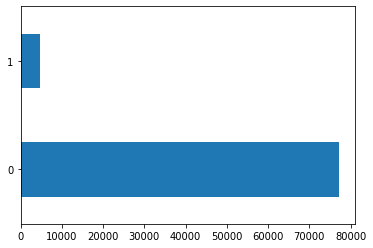

In [152]:
data["has_mental_impact"].value_counts().plot.barh()

In [153]:
data["username"].count()

82024

In [164]:
data = data.drop("index", axis =1)

In [165]:
# Train_Test Split

In [166]:
y = data["has_mental_impact"]
X = data.drop("has_mental_impact", axis = 1)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state  = 42)

In [168]:
X_train.head(5)

,date,username,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,negative,neutral,positive,positve,very
58223,17642,386,4,2,703,4,1,1,1,1,0,0,0,1
53989,27364,12718,3,3,2974,3,1,1,1,0,0,0,1,0
3660,17284,23225,4,8,2069,0,1,0,0,1,0,0,0,0
64220,26898,25005,4,3,2034,0,1,1,1,1,0,0,0,0
61553,28451,16787,4,3,3163,3,0,1,0,0,0,0,1,0


In [169]:
y_train.head()

58223    1
53989    0
3660     0
64220    1
61553    0
Name: has_mental_impact, dtype: int32

In [170]:
X_test.head()

,date,username,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,negative,neutral,positive,positve,very
5324,17144,5534,4,4,3129,2,0,1,0,0,0,1,0,0
32631,54499,2197,4,8,895,4,1,0,0,1,0,0,0,1
788,16750,7678,3,3,166,4,1,0,0,1,0,0,0,1
44453,889,440,5,0,1563,4,1,0,0,1,0,0,0,1
59712,20119,18829,4,2,3641,5,1,1,1,0,0,1,0,1


In [171]:
y_test.head()

5324     0
32631    0
788      0
44453    0
59712    0
Name: has_mental_impact, dtype: int32

In [172]:
# Standardization of the data

In [173]:
scale = StandardScaler()
features = X_train.columns
X_train = scale.fit_transform(X_train[features])

X_test = scale.transform(X_test)

In [174]:
#Logistic Regression Classifier

In [175]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [176]:
#Checking Accuracy Score

In [177]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [178]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[19311     0]
 [    0  1195]]


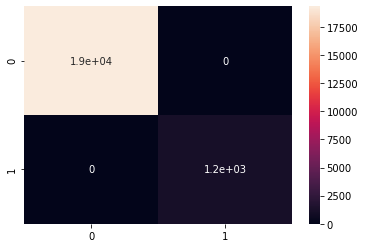

In [179]:
sns.heatmap(confusion_matrix,annot=True)

In [180]:
#Checking Classification Report

In [181]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19311
           1       1.00      1.00      1.00      1195

    accuracy                           1.00     20506
   macro avg       1.00      1.00      1.00     20506
weighted avg       1.00      1.00      1.00     20506



In [182]:
# ROC auc_score & curve

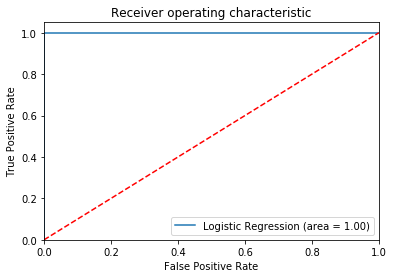

In [183]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()